In [1]:
import pandas as pd

**Import dataset**

In [2]:
df = pd.read_csv('/kaggle/input/zomato-dataset/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list', 'listed_in(city)'], axis = 1, inplace = True)

 **Renaming the columns**

In [4]:
df.rename(columns = {'name':'restaurants', 'book_table':'booking', 'rate':'rating', 'listed_in(city)':'city', 'approx_cost(for two people)':'cost', 'listed_in(type)':'types'}, inplace = True)
df.head(5)

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


I renamed the columns to shorter and more meaningful names like restaurants, booking, rating, city, cost, and types. This makes the dataset easier to work with. After that, I displayed the first 5 rows to confirm the changes.

**Dropping duplicates**

In [5]:
len(df)

51717

In [6]:
df.dropna()

,restaurants,online_order,booking,rating,votes,location,rest_type,cuisines,cost,types
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   51717 non-null  object
 1   online_order  51717 non-null  object
 2   booking       51717 non-null  object
 3   rating        43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   cost          51371 non-null  object
 9   types         51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [8]:
df[df.duplicated()].count().sum()

162840

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df[df.duplicated()].count().sum()

0

I dropped the duplicate rows from the dataset to ensure that each restaurant entry is unique and to avoid repetition in the analysis.

**Cleaning individual columns**

In [11]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rating'] = df['rating'].replace('New|\-|\/5|\/5','0', regex = True)
df['rating'].unique()

array(['4.10', '3.80', '3.70', '3.60', '4.60', '4.00', '4.20', '3.90',
       '3.10', '3.00', '3.20', '3.30', '2.80', '4.40', '4.30', 'NEW',
       '2.90', '3.50', nan, '2.60', '3.8 0', '3.40', '4.50', '2.50',
       '2.70', '4.70', '2.40', '2.20', '2.30', '3.4 0', '0', '3.6 0',
       '4.80', '3.9 0', '4.2 0', '4.0 0', '4.1 0', '3.7 0', '3.1 0',
       '2.9 0', '3.3 0', '2.8 0', '3.5 0', '2.7 0', '2.5 0', '3.2 0',
       '2.6 0', '4.5 0', '4.3 0', '4.4 0', '4.90', '2.10', '2.00', '1.80',
       '4.6 0', '4.9 0', '3.0 0', '4.8 0', '2.3 0', '4.7 0', '2.4 0',
       '2.1 0', '2.2 0', '2.0 0', '1.8 0'], dtype=object)

In [13]:
df['rating'] = df['rating'].replace(['NEW', '-', 'nan'], None)

In [14]:
df['rating'] = df['rating'].str.replace('/5', '', regex=True)

In [15]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [16]:
df['rating'] = df['rating'].fillna(0)

In [17]:
print(df['rating'].unique()[:20])
print(df['rating'].dtype)

[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 0.  2.9 3.5
 2.6 3.4]
float64


I cleaned the rating column by replacing values like 'New', '-', and formats such as '/5' with 0. This helps in standardizing the ratings into a numeric form. After that, I checked the unique values to verify the changes.

# **Data Visualization** 

In [18]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Restaurant delivering online or not**

In [19]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='online_order', ylabel='count'>

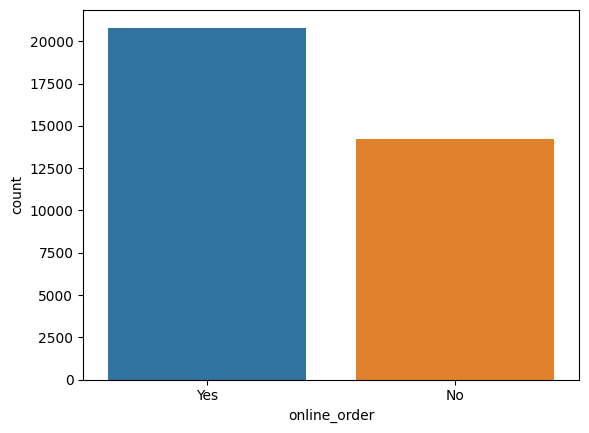

In [20]:
sns.countplot(x = 'online_order', data = df)

I plotted the count of restaurants that deliver food online versus those that do not. From the data, 30,444 restaurants offer online delivery while 21,273 do not. This shows that a majority of restaurants on Zomato provide online delivery services.

**Restaurant allowing table booking or not**

<Axes: xlabel='booking', ylabel='count'>

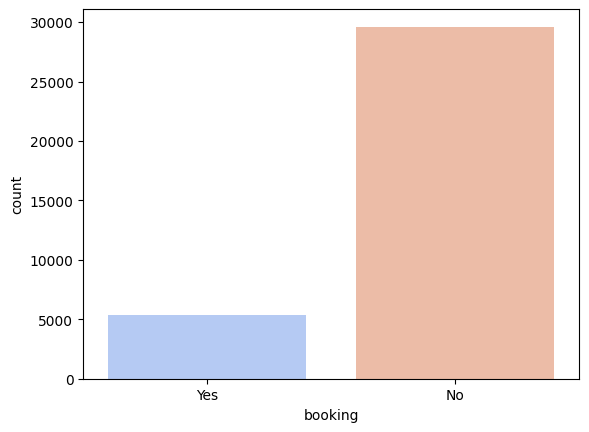

In [21]:
sns.countplot(x = 'booking', data = df, palette = 'coolwarm')

I visualized the number of restaurants that allow table booking compared to those that do not. This helps me understand the availability of reservation services among restaurants on Zomato.

**Table booking rate vs rate**

<Axes: xlabel='booking', ylabel='rating'>

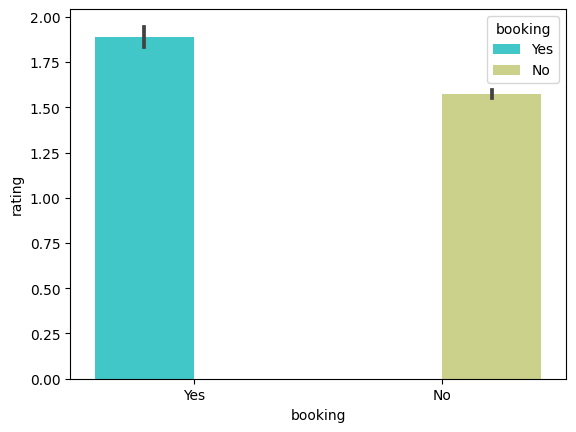

In [22]:
sns.barplot(x = 'booking', y = 'rating', hue = 'booking', data = df, palette = 'rainbow')

**Best Location**

In [23]:
best_loc = df.groupby('location')['rating'].count().reset_index()
best_loc.head()

,location,rating
0,BTM,2514
1,Banashankari,573
2,Banaswadi,442
3,Bannerghatta Road,1060
4,Basavanagudi,463


In [24]:
x = pd.DataFrame(df.groupby('location')['rating'].sum())
x.head()

,rating
location,
BTM,4351.1
Banashankari,1600.9
Banaswadi,847.7
Bannerghatta Road,2722.0
Basavanagudi,1040.6


In [25]:
best_loc = x.sort_values(by = 'rating', ascending = False).head(10)

<Axes: xlabel='rating', ylabel='location'>

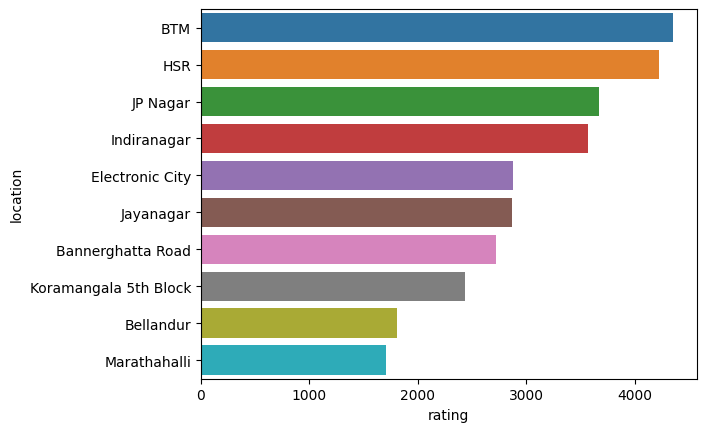

In [26]:
sns.barplot(best_loc, y = best_loc.index, x = 'rating')

**Relation between location and rating**

In [27]:
a = df.groupby('location')['rating'].mean()

In [28]:
s = a.sort_values(ascending=False).head(10)
print(s)

location
Rajarajeshwari Nagar    3.850000
Kanakapura Road         3.478947
Kengeri                 2.960000
Kumaraswamy Layout      2.837313
Nagawara                2.812821
Banashankari            2.793892
Rammurthy Nagar         2.647368
Mysore Road             2.609524
JP Nagar                2.600921
Bannerghatta Road       2.567925
Name: rating, dtype: float64


<Axes: xlabel='location'>

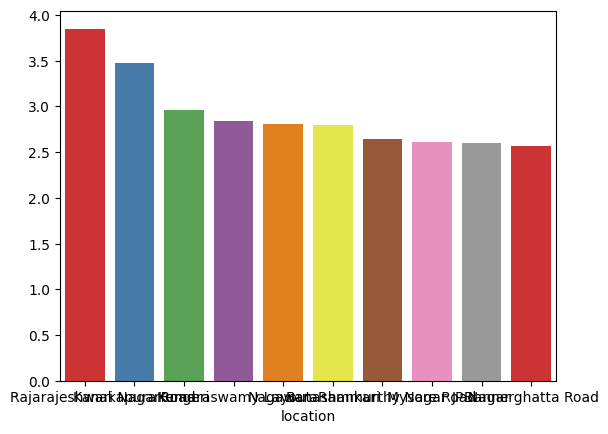

In [29]:
sns.barplot(x = s.index, y = s.values, palette = 'Set1')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rajarajeshwari Nagar'),
  Text(1, 0, 'Kanakapura Road'),
  Text(2, 0, 'Kengeri'),
  Text(3, 0, 'Kumaraswamy Layout'),
  Text(4, 0, 'Nagawara'),
  Text(5, 0, 'Banashankari'),
  Text(6, 0, 'Rammurthy Nagar'),
  Text(7, 0, 'Mysore Road'),
  Text(8, 0, 'JP Nagar'),
  Text(9, 0, 'Bannerghatta Road')])

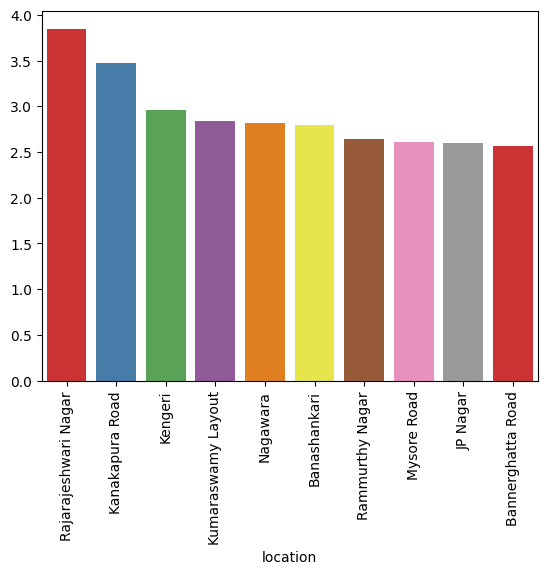

In [30]:
sns.barplot(x = s.index, y = s.values, palette = 'Set1')
plt.xticks(rotation = 90)

**Cost of restaurant**

In [31]:
df.columns

Index(['restaurants', 'online_order', 'booking', 'rating', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'types'],
      dtype='object')

In [32]:
df.cost

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: cost, Length: 35011, dtype: object

In [33]:
df['cost'] = df['cost'].str.replace(',', '')

In [34]:
df['cost'] = df['cost'].astype('float64')

In [35]:
df['cost'].isna().sum()

221

<Axes: xlabel='location'>

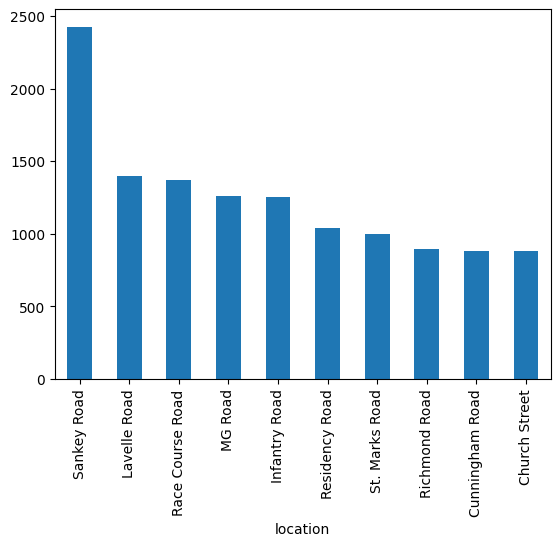

In [36]:
df.groupby(['location'])['cost'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='location'>

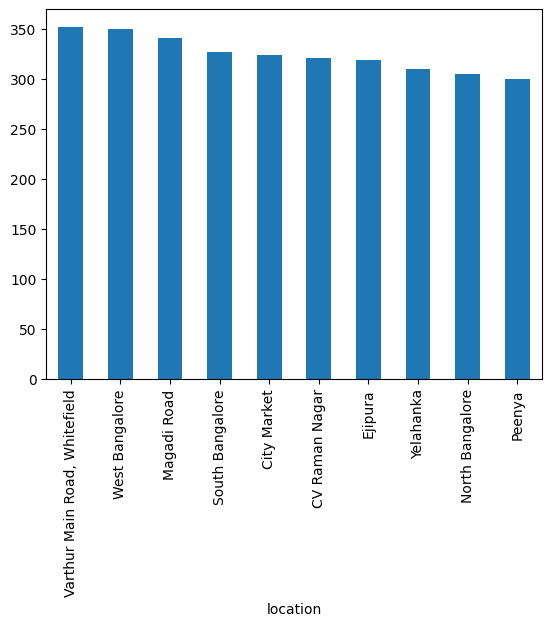

In [37]:
df.groupby('location')['cost'].mean().sort_values(ascending = False).tail(10).plot(kind = 'bar')

**Number of restaurant in location**

In [38]:
df['location'].value_counts().head()

location
BTM             2514
Whitefield      1972
Indiranagar     1789
HSR             1769
Marathahalli    1683
Name: count, dtype: int64

<Axes: xlabel='location'>

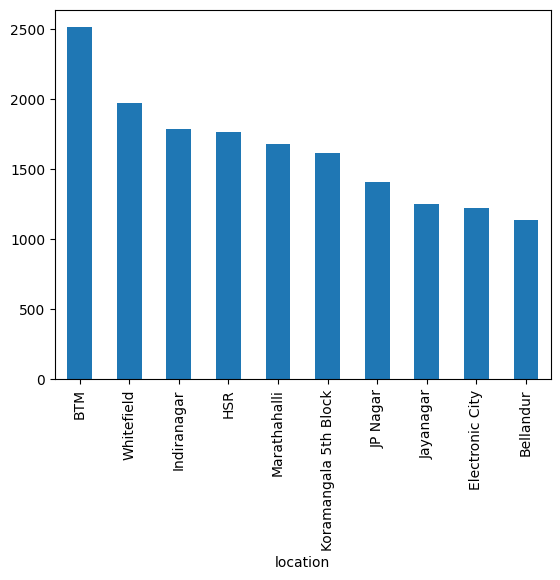

In [39]:
a = df['location'].value_counts().head(10).plot(kind = 'bar')
a

**Most famous restaurant chain in bengaluru**

In [40]:
df.columns

Index(['restaurants', 'online_order', 'booking', 'rating', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'types'],
      dtype='object')

In [41]:
df['rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    0.0
51713    0.0
51714    0.0
51715    0.0
51716    0.0
Name: rating, Length: 35011, dtype: float64

<Axes: xlabel='restaurants'>

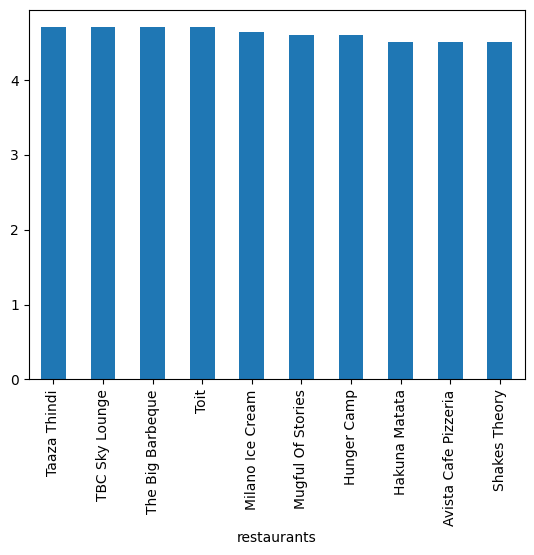

In [42]:
df.groupby('restaurants')['rating'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [43]:
df['restaurants'].unique().tolist()

['Jalsa',
 'Spice Elephant',
 'San Churro Cafe',
 'Addhuri Udupi Bhojana',
 'Grand Village',
 'Timepass Dinner',
 'Rosewood International Hotel - Bar & Restaurant',
 'Onesta',
 'Penthouse Cafe',
 'Smacznego',
 'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
 'Cafe Shuffle',
 'The Coffee Shack',
 'Caf-Eleven',
 'Cafe Vivacity',
 'Catch-up-ino',
 "Kirthi's Biryani",
 'T3H Cafe',
 '360 Atoms Restaurant And Cafe',
 'The Vintage Cafe',
 'Woodee Pizza',
 'Cafe Coffee Day',
 'My Tea House',
 'Hide Out Cafe',
 'CAFE NOVA',
 'Coffee Tindi',
 'Sea Green Cafe',
 'Cuppa',
 "Srinathji's Cafe",
 'Redberrys',
 'Foodiction',
 'Sweet Truth',
 'Ovenstory Pizza',
 'Faasos',
 'Behrouz Biryani',
 'Fast And Fresh',
 'Szechuan Dragon',
 'Empire Restaurant',
 'Maruthi Davangere Benne Dosa',
 'Chaatimes',
 'Havyaka Mess',
 "McDonald's",
 "Domino's Pizza",
 'Hotboxit',
 'Kitchen Garden',
 'Recipe',
 'Beijing Bites',
 'Tasty Bytes',
 'Petoo',
 'Shree Cool Point'

In [44]:
df['restaurants'].replace('Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©|ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©','',regex=True,inplace=True)

/tmp/ipykernel_13/2212084722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['restaurants'].replace('Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©|ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©','',regex=True,inplace=True)


In [45]:
df['restaurants'] = df['restaurants'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

<Axes: xlabel='restaurants'>

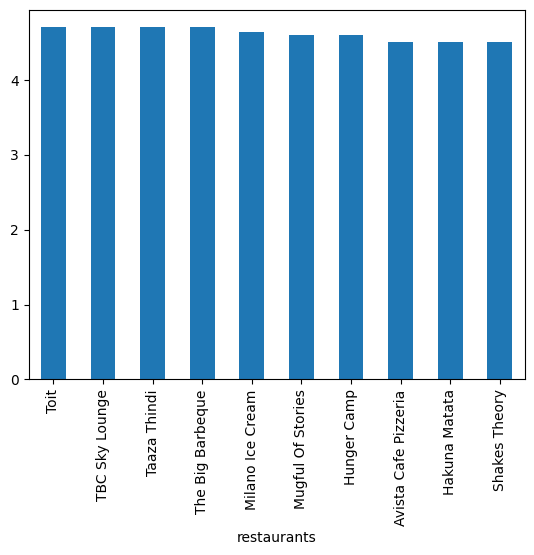

In [46]:
df.groupby('restaurants')['rating'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [47]:
df.groupby('restaurants')['rating'].mean().sort_values(ascending = False).head(10)

restaurants
Toit                    4.700000
TBC Sky Lounge          4.700000
Taaza Thindi            4.700000
The Big Barbeque        4.700000
Milano Ice Cream        4.633333
Mugful Of Stories       4.600000
Hunger Camp             4.600000
Avista Cafe Pizzeria    4.500000
Hakuna Matata           4.500000
Shakes Theory           4.500000
Name: rating, dtype: float64

It calculates the average rating for each restaurant, sorts them from highest to lowest, and shows the top 10 restaurants.

**I performed exploratory data analysis (EDA) on the Zomato dataset to understand restaurant ratings, popular cuisines, and location trends. The process involved cleaning the data, handling missing values, and converting ratings to numeric. I analyzed the top restaurants, locations, and cuisines, and identified the top 10 highest-rated restaurants by calculating the average ratings. The analysis revealed key insights about customer preferences, popular cuisines, and areas with highly-rated restaurants, providing a clear overview of Zomato’s restaurant landscape.**

**Thank You**